In [354]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [355]:
df = pd.read_csv("/home/sufiyan/UB/Intro to ML/project 1/wdbc.csv",header=None)
df = df.drop(df.columns[0],axis=1)

In [356]:
#map column values
all_y = df[df.columns[0]]
all_y = all_y.map({'M':1,'B':0})
df[df.columns[0]] = all_y

In [357]:
#split data set into X and Y
all_y = all_y.to_frame()
all_x = df[df.columns[1:]]

In [358]:
#split data in training, validation and testing
xtrain_old,xtest_old,ytrain_old,ytest_old = train_test_split(all_x,all_y,test_size=0.2, random_state=3)
xval_old,xtest,yval_old,ytest = train_test_split(xtest_old,ytest_old,test_size=0.5,random_state=3)
#I've used random_state since I ran the code multiple times and dindn't want the training set etc to change every time 

In [359]:
#get the Y values in the form of a numpy array and of the right dimensions
Ytrain = ytrain_old.values
Yval = yval_old.values
Ytest = ytest.values
Ytrain = Ytrain.reshape(1,Ytrain.shape[0])
Yval = Yval.reshape(1,Yval.shape[0])
Ytest = Ytest.reshape(1,Ytest.shape[0])


In [360]:
#normalize the X data
Xtrain = preprocessing.normalize(xtrain_old,norm="l2")
Xval = preprocessing.normalize(xval_old,norm="l2")
Xtest = preprocessing.normalize(xtest,norm="l2")
Xtrain = Xtrain.T
Xval = Xval.T
Xtest = Xtest.T


In [361]:
#sigmoid function
def sigmoid(y):
    return(1/(1+np.exp(-y)))

In [405]:
#initialize things required
track_loss = []
validate_loss = []
m = Xtrain.shape[1]
m1 = Xval.shape[1]
b = 0
lr = 0.1
w = np.zeros([Xtrain.shape[0],1])

In [412]:
for epoch in range(15000):
    z = np.dot(w.T,Xtrain) + b
    z1 = np.dot(w.T,Xval) + b
    p = sigmoid(z)
    p1 = sigmoid(z1)
    cost = -np.sum(np.multiply(np.log(p),Ytrain) + np.multiply((1-Ytrain),np.log(1-p)))/m
    cost1 = -np.sum(np.multiply(np.log(p1),Yval) + np.multiply((1-Yval),np.log(1-p1)))/m1
    dz = p - Ytrain
    track_loss.append(np.squeeze(cost))
    validate_loss.append(np.squeeze(cost1))

    dw = (1/m)*np.dot(Xtrain,dz.T)
    db = (1/m)*np.sum(dz)

    w = w - (lr*dw)
    b = b - (lr*db)

Learning Rate:  0.1
Epoch:  14999


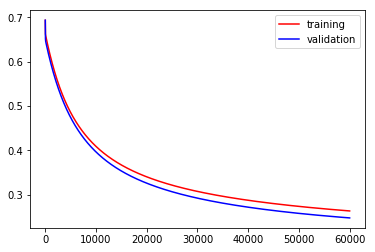

In [413]:
print("Learning Rate: ",lr)
print("Epoch: ",epoch)
plt.plot(track_loss,'r',label = 'training')
plt.plot(validate_loss,'b',label = 'validation')
plt.legend()

In [414]:
#predict for test cases
raw_predicted = np.dot(w.T,Xtest) + b
predicted = sigmoid(raw_predicted)

In [415]:
#get predicted value in terms of 0 and 1
predicted[predicted>0.5] = 1
predicted[predicted<0.5] = 0
predicted = predicted.astype(int)

In [420]:
#calculate TP TN FP FN
accuracy = accuracy_score(Ytest[0],predicted[0])
#report = classification_report(Ytest[0],predicted[0])
conf_matrix = confusion_matrix(Ytest[0],predicted[0])
print(conf_matrix)
#print(accuracy)

[[37  0]
 [ 2 18]]


In [417]:
TP = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TN = conf_matrix[1][1]

In [418]:
#calculate accuracy, recall and precision
#Accuracy = ratio of correctly predicted observation to the total observations
#Precision = ratio of correctly predicted positive observations to the total predicted positive observations
#Recall = ratio of correctly predicted positive observations to the all observations in actual class
#F1 Score = the weighted average of Precision and Recall
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall * Precision) / (Recall + Precision)

In [419]:
print("\t\tEVALUATION(in percentage)\n\n")
print("Accuracy : ", Accuracy*100,"%")
print("Precision : ", Precision*100,"%")
print("Recall : ", Recall*100,"%")
print("F1 Score : ", F1*100,"%")

		EVALUATION(in percentage)


Accuracy :  96.49122807017544 %
Precision :  94.87179487179486 %
Recall :  100.0 %
F1 Score :  97.36842105263158 %
